# Final Model Structure - Team 14

### 1) Data preprocessing attemps
    - Convert Image to be normalized 100x100 grayscale matrix
    - Compress the Image to 20x20 by using average value of 5x5 bolck
    - Center the Image
    - Onehot encodeding the label
    - Equally split each class' data into train/test
    - Augmentation dataset by roate image with random (-10,10) degree and strech to similar size
        - double the dataset size
    

### 1-1) Data preprocessing Kept
    - Convert Image to be normalized 100x100 grayscale matrix
    - Center the Image
    - Onehot encodeding the label
    - Equally split each class' data into train/test
    (see Data Preprocessing notebook for detile)

### 2) Model Selection
- CNN model from tensorflow with:
    - Conv2D Layer with 32 Neurons, kernel size (3,3), activation function "relu", and l2 regulizar with parameter 0.01
    - MaxPooling2D Layer (2x2)
    - Conv2D Layer with 64 Neurons, kernel size (3,3), activation function "relu", and l2 regulizar with parameter 0.01
    - MaxPooling2D Layer (2x2)
    - Conv2D Layer with 128 Neurons, kernel size (3,3), activation function "relu", and l2 regulizar with parameter 0.01
    - MaxPooling2D Layer (2x2) </br></br>
    - Flatten Layer
    - Dense Layer with 64 Neurons, activation function "relu", and l2 regulizar with parameter 0.01
    - Dropout Layer with rate 0.18
    - Output Layer with 62 node and output probability of label using activation function "softmax"
</br>
#### (model structure determind by grid search and other experiment)

In [1]:
# load preporcessed dataset
import numpy
import pandas as pd
import numpy as np

dataset = pd.read_csv('archive/english.csv')
directory = "archive"

imageDatas = []
files = dataset["image"]
label = dataset["label"]
dimention = "100x100"
npzFileName = "Centered_" + dimention + ".npz"

# Load  compressed image matrix data
data = numpy.load(npzFileName)
ImageData_centered = data['ImageData_centered']
print("=======done loading=======")

print(ImageData_centered.shape)

=======done loading=======
(3410, 100, 100, 1)


In [ ]:
plt.imshow(ImageData_centered[0])
plt.show()

In [16]:
import random

def getIndex(letter):
    index = ord(letter)-48
    if (index > 10):
        index -= 7
    if (index > 35):
        index -= 6
    return index

data_nparr = ImageData_centered
label_nparr = np.array(label)

test_index = []
# Randomly select 6 items from each group of 55
selected_indices = []
print(label_nparr.shape)
for i in range(0, len(label_nparr), 55):
    charGroup = data_nparr[i:i+55]
    indices = random.sample(range(i, i+55), 10)
    test_index.extend(indices)

test_index_nparr = np.array(test_index)
print(test_index_nparr.shape)

train_data, test_data, train_label, test_label = [], [], [], []
for i in range(len(label_nparr)):
    if i in test_index:
        test_data += [data_nparr[i]]
        test_label += [getIndex(label_nparr[i])]
    else:
        train_data += [data_nparr[i]]
        train_label += [getIndex(label_nparr[i])]

train_data = np.array(train_data)
test_data = np.array(test_data)
train_label = np.array(train_label)
test_label = np.array(test_label)

train_label_onehot = pd.get_dummies(train_label) # one-hot enc
test_label_onehot = pd.get_dummies(test_label) # one-hot enc

print(train_data.shape)

(3410,)
(620,)
(2790, 100, 100, 1)


In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers

def create_model(kernel_size1 = 3, kernel_size2 = 3, regulazation_p = 0.01, dense_node = 128, drop_out_rate = 0.1):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (kernel_size1, kernel_size1), activation='relu', input_shape=data_nparr[0].shape, kernel_regularizer=regularizers.l2(regulazation_p)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (kernel_size2, kernel_size2), activation='relu', kernel_regularizer=regularizers.l2(regulazation_p)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(regulazation_p)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(dense_node, activation='relu', kernel_regularizer=regularizers.l2(regulazation_p)))
    model.add(layers.Dropout(drop_out_rate))
    model.add(layers.Dense(62, activation='softmax'))
    
    return model

In [28]:
model = create_model(**{'dense_node': 64, 'drop_out_rate': 0.18, 'kernel_size1': 3, 'kernel_size2': 3, 'regulazation_p': 0.01})
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 10, 10, 128)     

In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("======start training======")
history = model.fit(train_data, train_label_onehot, epochs=20, 
                    validation_data=(test_data, test_label_onehot))
print("======done training======")

======start training======
Epoch 1/20
88/88 [==============================] - 11s 113ms/step - loss: 4.5770 - accuracy: 0.0369 - val_loss: 3.8352 - val_accuracy: 0.0903
Epoch 2/20
88/88 [==============================] - 10s 111ms/step - loss: 3.4790 - accuracy: 0.1706 - val_loss: 2.8902 - val_accuracy: 0.3306
Epoch 3/20
88/88 [==============================] - 10s 111ms/step - loss: 2.7030 - accuracy: 0.3434 - val_loss: 2.4288 - val_accuracy: 0.4290
Epoch 4/20
88/88 [==============================] - 10s 112ms/step - loss: 2.3963 - accuracy: 0.4125 - val_loss: 2.0710 - val_accuracy: 0.5565
Epoch 5/20
88/88 [==============================] - 10s 111ms/step - loss: 2.1172 - accuracy: 0.5014 - val_loss: 1.8927 - val_accuracy: 0.5823
Epoch 6/20
88/88 [==============================] - 10s 114ms/step - loss: 1.9136 - accuracy: 0.5523 - val_loss: 1.8050 - val_accuracy: 0.6097
Epoch 7/20
88/88 [==============================] - 10s 113ms/step - loss: 1.7758 - accuracy: 0.5993 - val_loss: 1.

In [30]:
# save model
model.save('../CNN_final_ver.h5')
print("======model saved======")

======model saved======


20/20 - 1s - loss: 1.1673 - accuracy: 0.7903 - 575ms/epoch - 29ms/step
Test set accurcy:  0.7903226017951965


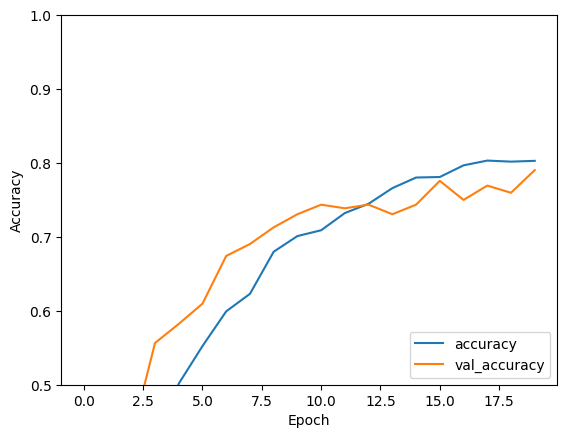

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data,  test_label_onehot, verbose=2)
print("Test set accurcy: ", test_acc)

In [34]:
from sklearn.metrics import classification_report

# Function to convert one-hot encoded label to label index
def get_result(prob_array):
    return np.argmax(prob_array)

test_pred = model.predict(test_data)
test_result = np.apply_along_axis(get_result, axis=1, arr=test_pred)


class_names = ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
class_names = class_names[0]

print(classification_report(test_label, test_result, target_names=class_names,  zero_division=1))

20/20 [==============================] - 1s 28ms/step
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       0.47      0.80      0.59        10
           2       0.80      0.40      0.53        10
           3       0.86      0.60      0.71        10
           4       0.90      0.90      0.90        10
           5       0.82      0.90      0.86        10
           6       0.71      1.00      0.83        10
           7       1.00      0.90      0.95        10
           8       0.91      1.00      0.95        10
           9       0.57      0.80      0.67        10
           A       0.91      1.00      0.95        10
           B       1.00      0.90      0.95        10
           C       0.67      0.80      0.73        10
           D       0.91      1.00      0.95        10
           E       1.00      0.90      0.95        10
           F       0.90      0.90      0.90        10
           G       1.00    

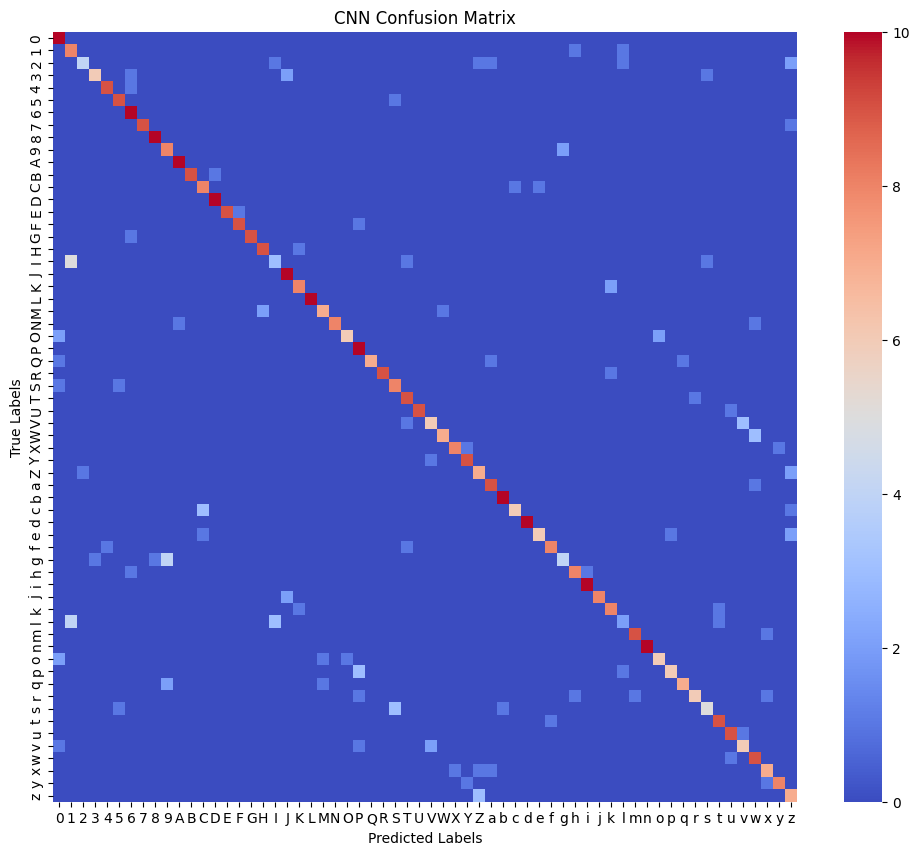

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(test_label, test_result)


# Plot the confusion matrix as a heat map
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="coolwarm", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("CNN Confusion Matrix")
plt.show()

In [39]:
# calculate results
Result = []
oneCharResult = []
test_size = 10 # per char
# initialize
for letter in range(len(class_names)):
    oneCharResult = []
    for predicte in range(len(class_names)):
        oneCharResult += [0]
    Result +=[oneCharResult]

    
for i in range(len(test_label)):
    pred = test_result[i]
    actual = test_label[i]
    
    
    if pred != actual:
        actualLetter = int(i/test_size)
        Result[actualLetter][pred] = Result[actualLetter][pred] + 1


falsePredict = []

print("Each char has total 10 test image data")
for letter in range(len(class_names)):
    haveNotPrintLetter = 1
    for p in range(len(class_names)):
        if Result[letter][p] >= 1:
            if haveNotPrintLetter == 1:
                print("Letter :", class_names[letter])
                haveNotPrintLetter = 0
            print("   - mispredict: [", class_names[p], "] ",Result[letter][p])
        
    falsePredict += [np.sum(Result[letter])]
    
print("False Predict of each class: \n", falsePredict)

Each char has total 10 test image data
Letter : 1
   - mispredict: [ h ]  1
   - mispredict: [ l ]  1
Letter : 2
   - mispredict: [ I ]  1
   - mispredict: [ Z ]  1
   - mispredict: [ a ]  1
   - mispredict: [ l ]  1
   - mispredict: [ z ]  2
Letter : 3
   - mispredict: [ 6 ]  1
   - mispredict: [ J ]  2
   - mispredict: [ s ]  1
Letter : 4
   - mispredict: [ 6 ]  1
Letter : 5
   - mispredict: [ S ]  1
Letter : 7
   - mispredict: [ z ]  1
Letter : 9
   - mispredict: [ g ]  2
Letter : B
   - mispredict: [ D ]  1
Letter : C
   - mispredict: [ c ]  1
   - mispredict: [ e ]  1
Letter : E
   - mispredict: [ F ]  1
Letter : F
   - mispredict: [ P ]  1
Letter : G
   - mispredict: [ 6 ]  1
Letter : H
   - mispredict: [ K ]  1
Letter : I
   - mispredict: [ 1 ]  5
   - mispredict: [ T ]  1
   - mispredict: [ s ]  1
Letter : K
   - mispredict: [ k ]  2
Letter : M
   - mispredict: [ H ]  2
   - mispredict: [ W ]  1
Letter : N
   - mispredict: [ A ]  1
   - mispredict: [ w ]  1
Letter : O
   - misp